# Desafio 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("subsample_GO_demo.csv")

# Desafio 2

In [2]:
import ancilliary_funcs as py
#Contador de casos perdidos
cont=0
for i in df:
    cont+=py.perdida(df,i)[0]
print (cont)


86


# Desafio 3

In [15]:
df["puntajez"]=((df["gle_cgdpc"]-df["gle_cgdpc"].mean())/df["gle_cgdpc"].std())

In [16]:
new=df.dropna(subset=["gle_cgdpc"]).sort_values("puntajez")

In [17]:
new.head(10)

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,puntajez
1,125,0.351,NER,SubSaharian,644.53998,NaN,NaN,0.15,8.400000,5.821299,-0.752872
18,26,0.406,BDI,SubSaharian,663.57001,NaN,66.900002,4.16,NaN,7.535565,-0.751735
6,54,0.441,ETH,SubSaharian,900.77002,88.347000,46.500000,1.86,4.700000,4.884313,-0.737566
16,70,0.414,GIN,SubSaharian,993.83002,11.745000,65.199997,0.22,NaN,5.644798,-0.732008
54,55,0.418,ERI,SubSaharian,1007.28000,NaN,NaN,0.62,NaN,3.338293,-0.731204
93,106,0.438,MLI,SubSaharian,1063.26000,14.854000,79.599998,0.61,18.600000,6.862166,-0.727860
86,187,0.399,BFA,SubSaharian,1095.96000,16.500000,65.800003,4.64,19.100000,4.960263,-0.725907
67,83,0.466,CIV,SubSaharian,1354.29000,22.524000,76.199997,3.15,NaN,5.716274,-0.710476
4,185,0.519,TZA,SubSaharian,1416.30000,43.880001,37.700001,4.20,16.299999,5.580116,-0.706772
29,159,NaN,SOM,SubSaharian,1436.74000,NaN,NaN,0.00,NaN,NaN,-0.705551


In [18]:
new.tail(10)

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,puntajez
68,3,0.857,AND,WesternDem,32367.330,NaN,NaN,9.979999,33.099998,8.127135,1.142031
15,82,0.881,ITA,WesternDem,32931.672,60.783001,3.2,7.560000,24.200001,9.247918,1.175741
84,85,0.902,JPN,EastAsia,36123.770,127.120003,2.2,7.550000,22.799999,10.228745,1.366415
90,58,0.893,FIN,WesternDem,36958.211,5.427000,2.4,8.800000,21.799999,9.679909,1.416259
20,8,0.937,AUS,WesternDem,38611.949,23.621000,4.1,9.710000,16.000000,9.422300,1.515042
85,64,0.924,DEU,WesternDem,39486.699,80.983002,3.4,11.030000,30.700001,11.297001,1.567293
0,127,0.948,NOR,WesternDem,57634.770,5.156000,2.2,6.060000,24.100000,9.719718,2.651335
50,101,0.896,LUX,WesternDem,61404.480,0.550000,1.7,11.120000,24.400000,6.937873,2.876511
14,91,0.799,KWT,NorthAfrica,64342.711,3.999000,9.5,0.020000,NaN,3.042368,3.052021
51,111,NaN,MCO,WesternDem,108481.130,NaN,NaN,NaN,NaN,4.337683,5.688549


### No se le observan caracteristicas en común

# Desafio 4

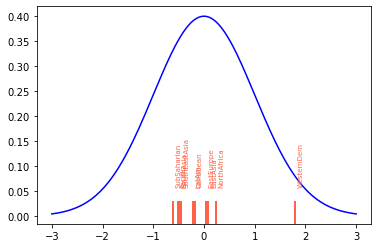

In [56]:
from scipy.stats import norm
import scipy.stats as stats
var=new["gle_cgdpc"]
x_axis=np.linspace(-3,3,200)
plt.plot(x_axis,norm.pdf(x_axis,0,1), color="blue")
it=new.groupby("ht_region")["puntajez"].mean()
for i,v in it.items():
    plt.axvline(v,ymin=0,ymax=.1, color="tomato", lw=2)
    plt.annotate(i,xy=(v+.05,0.06), color="tomato",rotation=90,size=7)



# Desafio 5

In [ ]:
def curvas(df, variable):
    py.graficar_media(df,df,variable,sample_mean=False, true_mean=False)
    var=df[variable].dropna()
    x_min, x_max = plt.xlim()
    x_axis = np.linspace(x_min, x_max, 100)
    gauss_kde = stats.gaussian_kde(var)
    plt.plot(x_axis, stats.norm.pdf(x_axis,var.mean(),var.std()),color='tomato', lw=3)
    curvas(df,"imf_pop")

In [ ]:
curvas(df,"gle_cgdpc")

In [ ]:
curvas(df,"wdi_exph")